# Wine Quality Prediction Using Xgboost

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [220]:
wine_data = pd.read_csv('D:/winequality.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis (EDA)

In [221]:
wine_data.shape

(1599, 12)

In [222]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [223]:
# Checking for null values in columns of dataset
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [224]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [225]:
wine_data.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Data Visualizations

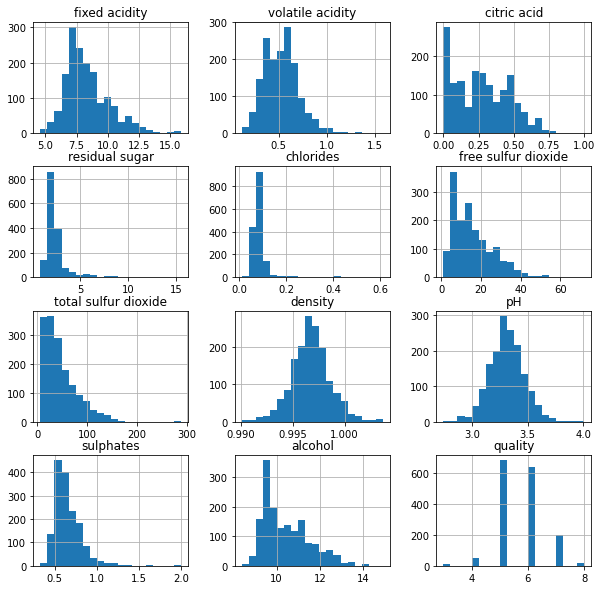

In [226]:
wine_data.hist(bins=20, figsize=(10, 10))
plt.show()

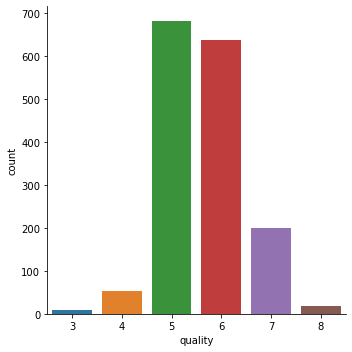

In [227]:
# number of values for each quality
sns.catplot(x='quality', data = wine_data, kind = 'count')

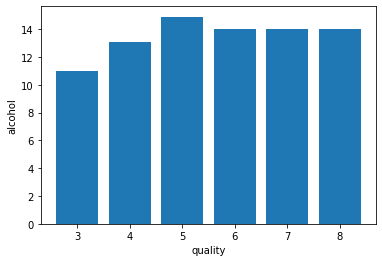

In [228]:
plt.bar(wine_data['quality'], wine_data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

## Correlation Heatmap

In [229]:
correlation = wine_data.corr()

<AxesSubplot:>

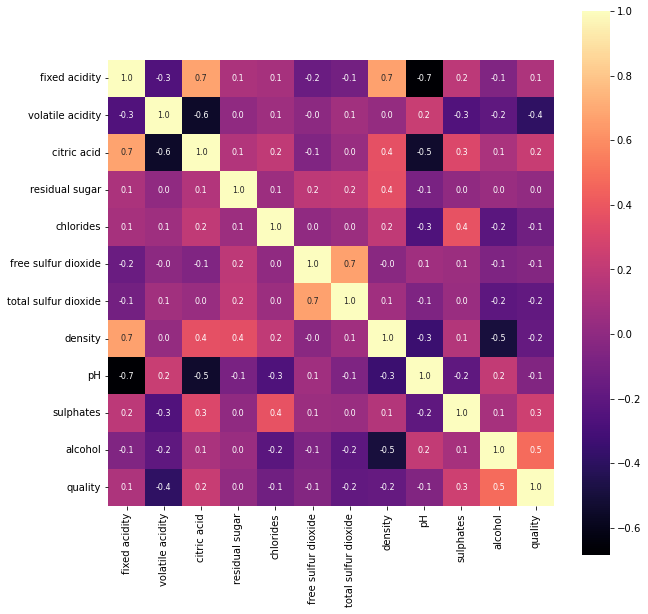

In [230]:
# constructing a heatmap to understand the correlation between different columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8},cmap="magma")

### We can see "alcohol" column is highly positive correlated with the "quality" column and "volatile acidity" has high negative correlation with the "quality" column

## Data Preprocessing

In [231]:
X = wine_data.drop(['quality'], axis=1)

In [232]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Label Encoding

In [233]:
y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### For quality value greater than or equal to 7 its a good quality wine else its a bad quality wine 

## Model Development

In [234]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3)

print (X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [235]:
# Define the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    max_depth=4,  # maximum depth of a tree
    learning_rate=0.3,  # step size shrinkage to prevent overfitting
    n_estimators=100,  # number of trees (boosting rounds)
    eval_metric='logloss'  # evaluation metric
)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [236]:
train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 1.0


In [241]:
# Evaluate the performance of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Accuracy: 0.940625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       283
           1       0.78      0.57      0.66        37

    accuracy                           0.93       320
   macro avg       0.86      0.77      0.81       320
weighted avg       0.93      0.93      0.93       320



## Wine Quality Prediction System

In [242]:
# use any data instance from wine quality dataset
input_data = (8.0,0.59,0.16,1.8,0.065,3.0,16.0,0.9962,3.42,0.92,10.5)

# changing the input_data to numpy array
input_numpy_array = np.asarray(input_data)

# reshape the array for predicting one instance  
input_data_reshaped = input_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Predicted Label: ", prediction)

if (prediction[0] == 1):
  print('Good quality Wine')
else:
  print('Bad quality Wine')

Predicted Label:  [1]
Good quality Wine
